In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import json
import pandas as pd
import numpy as np
from datasets import load_dataset

import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm

if os.path.basename(os.getcwd()) == "notebooks":
    os.chdir(os.path.dirname(os.getcwd()))

import debias_vsi as dv

In [3]:
df = dv.get_vsi_with_scores()
df

Evaluating /Users/ebrown/workspace/vsibench_debiased_internal/data/ref_evals/bld_sims_3q_10k_blind.jsonl: 100%|██████████| 5130/5130 [00:00<00:00, 14089.97it/s]
Evaluating /Users/ebrown/workspace/vsibench_debiased_internal/data/ref_evals/blk_sims_3q_10k_blind.jsonl: 100%|██████████| 5130/5130 [00:00<00:00, 15594.94it/s]
Evaluating /Users/ebrown/workspace/vsibench_debiased_internal/data/ref_evals/cambrian-s.jsonl: 100%|██████████| 5130/5130 [00:00<00:00, 15530.34it/s]
Evaluating /Users/ebrown/workspace/vsibench_debiased_internal/data/ref_evals/cambrian-s_blind.jsonl: 100%|██████████| 5130/5130 [00:00<00:00, 15543.57it/s]
Evaluating /Users/ebrown/workspace/vsibench_debiased_internal/data/ref_evals/gemini-1.5_pro.jsonl: 100%|██████████| 5156/5156 [00:00<00:00, 13365.12it/s]
Evaluating /Users/ebrown/workspace/vsibench_debiased_internal/data/ref_evals/llava_vid_7b.jsonl: 100%|██████████| 5156/5156 [00:00<00:00, 14617.79it/s]
Evaluating /Users/ebrown/workspace/vsibench_debiased_internal/data

Loaded 5130 files. Loading VSI-Bench...


id      dataset    scene_name    question_type  \
0        0  arkitscenes      41069025  object_counting   
1        1  arkitscenes      41069025  object_counting   
2        2  arkitscenes      41069043  object_counting   
3        3  arkitscenes      41125700  object_counting   
4        4  arkitscenes      41125700  object_counting   
...    ...          ...           ...              ...   
5125  5151      scannet  scene0196_00   route_planning   
5126  5152      scannet  scene0378_01   route_planning   
5127  5153  arkitscenes      47331654   route_planning   
5128  5154  arkitscenes      42445026   route_planning   
5129  5155  arkitscenes      42446529   route_planning   

                                               question ground_truth  \
0                   How many table(s) are in this room?            4   
1                   How many chair(s) are in this room?            2   
2                   How many table(s) are in this room?            2   
3                    How many sofa(s) are in this room?            2   
4                   How many table(s) are in this room?            3   
...                                                 ...          ...   
5125  You are a robot beginning at the trash bin nea...            C   
5126  You are a robot beginning at the door and faci...            A   
5127  You are a robot beginning at the heater and fa...            D   
5128  You are a robot beginning at the doorframe and...            C   
5129  You are a robot beginning at the closet and fa...            A   

                                                options  \
0                                                  None   
1                                                  None   
2                                                  None   
3                                                  None   
4                                                  None   
...                                                 ...   
5125  [A. Turn Right, Turn Left, B. Turn Right, Turn...   
5126  [A. Turn Left, Turn Left, Turn Left, B. Turn L...   
5127  [A. Turn Left, Turn Right, B. Turn Back, Turn ...   
5128        [A. Turn Left, B. Turn Back, C. Turn Right]   
5129  [A. Turn Right, Turn Left, Turn Left, B. Turn ...   

      bld_sims_3q_10k_blind  blk_sims_3q_10k_blind  cambrian-s  ...  \
0                       0.0                    0.0         0.1  ...   
1                       0.1                    0.1         1.0  ...   
2                       0.1                    0.1         1.0  ...   
3                       0.1                    0.1         1.0  ...   
4                       0.0                    0.0         0.4  ...   
...                     ...                    ...         ...  ...   
5125                    0.0                    0.0         0.0  ...   
5126                    0.0                    0.0         0.0  ...   
5127                    0.0                    0.0         0.0  ...   
5128                    1.0                    1.0         1.0  ...   
5129                    0.0                    1.0         1.0  ...   

      rgb_sims_3q_25k  rgb_sims_3q_25k_blind  rgb_sims_manV2_5k  \
0                 0.1                    0.0                0.1   
1                 0.1                    0.1                0.1   
2                 1.0                    0.1                1.0   
3                 0.1                    0.1                0.1   
4                 0.4                    0.0                0.4   
...               ...                    ...                ...   
5125              0.0                    0.0                0.0   
5126              0.0                    0.0                0.0   
5127              0.0                    0.0                0.0   
5128              1.0                    1.0                1.0   
5129              1.0                    1.0                1.0   

      rgb_sims_manV2_5k_blind  vsi_train_10k  vsi_train_10k_blind  \
0         

In [4]:
print(dv.evaluate_models(df))

                             bld_sims_3q_10k_blind  blk_sims_3q_10k_blind  \
question_type                                                               
obj_appearance_order                     31.877023              22.653722   
object_abs_distance                      27.494005              27.589928   
object_counting                           7.769912               7.769912   
object_rel_direction_easy                50.691244              51.152074   
object_rel_direction_hard                41.554960              40.750670   
object_rel_direction_medium              44.708995              46.296296   
object_rel_distance                      29.436620              29.154930   
object_size_estimation                   34.428122              25.886674   
room_size_estimation                     27.708333              28.090278   
route_planning                           30.927835              32.474227   
overall                                  30.820663              28.257310   

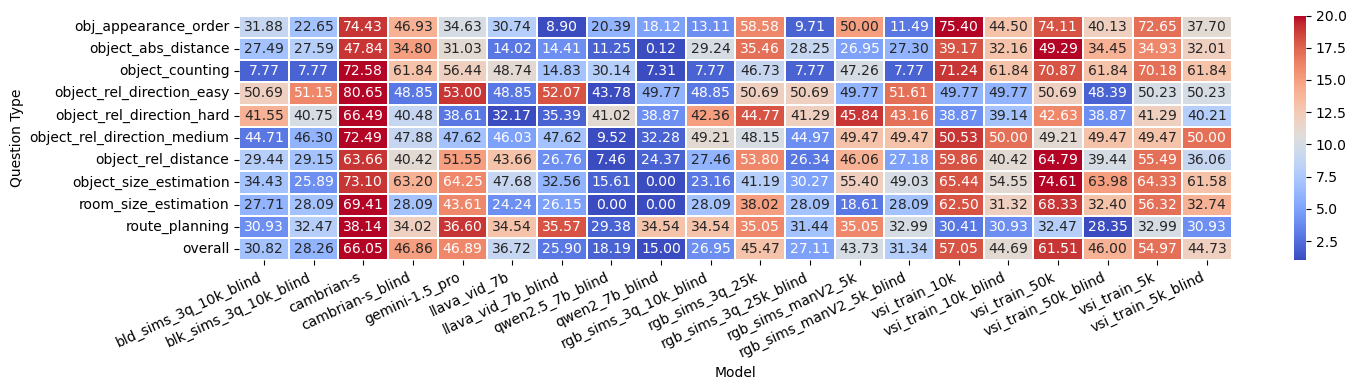

In [5]:
dv.visualize_model_scores(df);

## Object Size

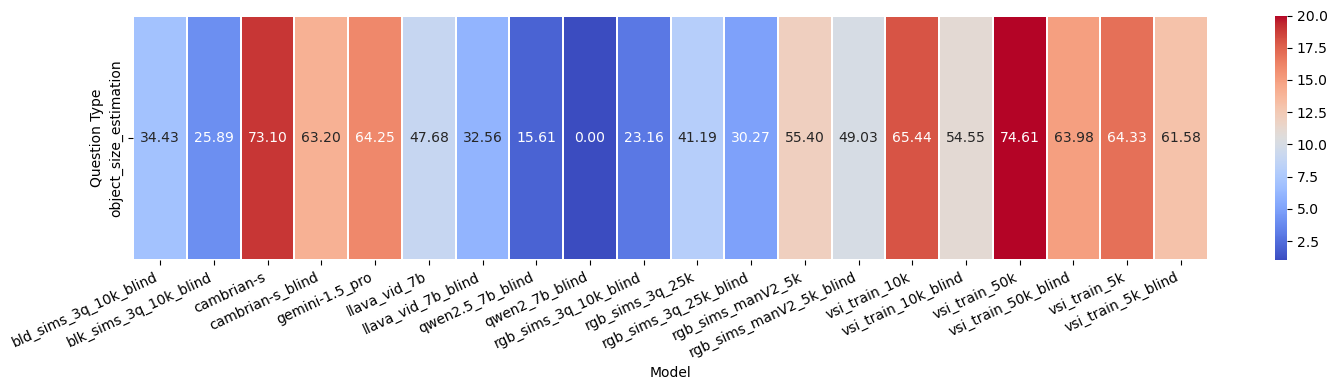

In [6]:
dv.visualize_model_scores(df.loc[df["question_type"] == "object_size_estimation"]);

In [7]:
import re

# question format: "What is the length of the longest dimension (length, width, or height) of the OBJECT, measured in centimeters?'"

qdf = df[df["question_type"] == "object_size_estimation"].copy()
qdf["object"] = qdf["question"].str.extract(r'height\) of the (.*), measured')[0]

qdf["object"].value_counts()

object
table       81
tv          78
door        76
bed         62
chair       41
            ..
bowl         1
bucket       1
mattress     1
guitar       1
piano        1
Name: count, Length: 64, dtype: int64

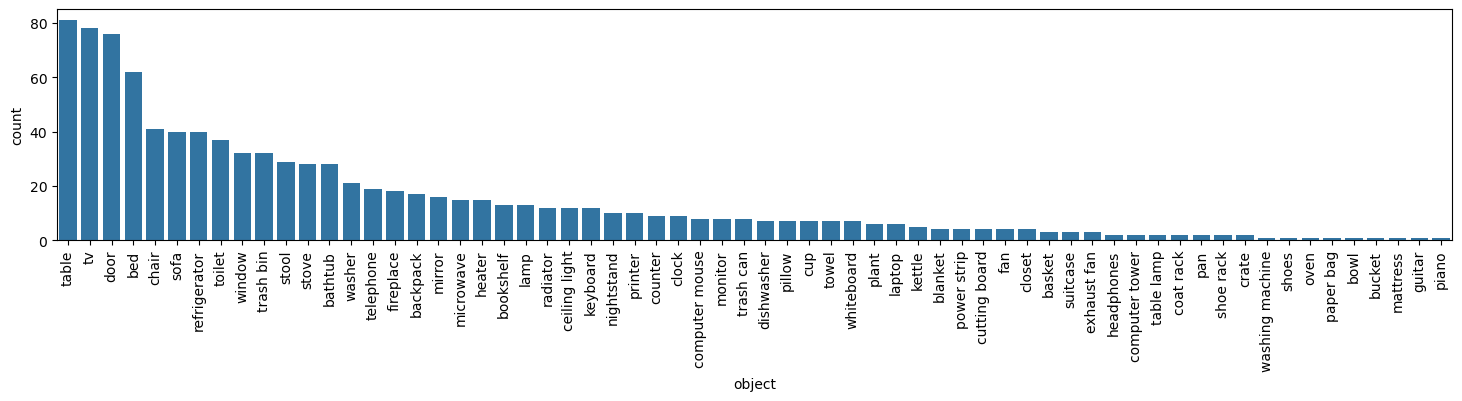

In [8]:
# visualize the distribution of objects
plt.figure(figsize=(18, 3))

sns.countplot(data=qdf, x="object", order=qdf["object"].value_counts().index)
plt.xticks(rotation=90)
print()

In [9]:
qdf.iloc[0]

id                                                                       167
dataset                                                          arkitscenes
scene_name                                                          41069025
question_type                                         object_size_estimation
question                   What is the length of the longest dimension (l...
ground_truth                                                              62
options                                                                 None
bld_sims_3q_10k_blind                                                    0.0
blk_sims_3q_10k_blind                                                    0.0
cambrian-s                                                               1.0
cambrian-s_blind                                                         1.0
gemini-1.5_pro                                                           1.0
llava_vid_7b                                                             1.0

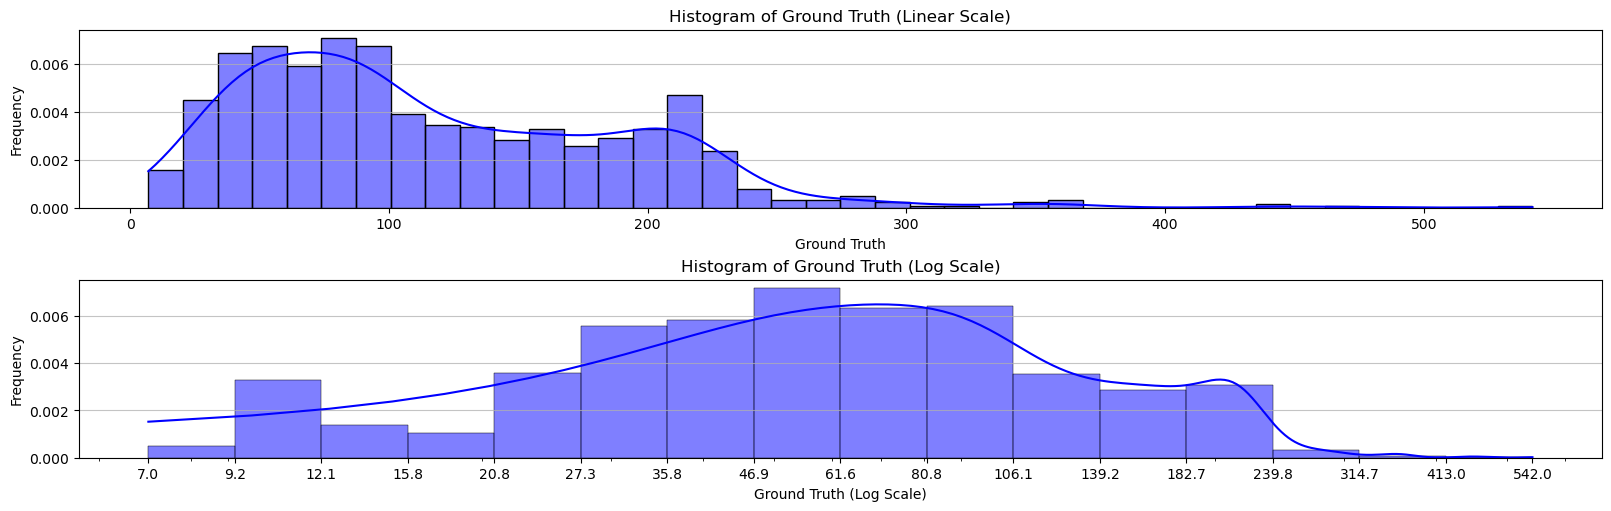

In [10]:
fig, axes = plt.subplots(2, 1, figsize=(16, 5), constrained_layout=True)

# First plot: Linear scale
qdf['ground_truth_num'] = pd.to_numeric(qdf['ground_truth'], errors='coerce')  # Convert to numeric if possible
gt_series = qdf['ground_truth_num'].dropna()
sns.histplot(gt_series, bins=40, kde=True, color='blue', edgecolor='black', ax=axes[0], stat='density')
axes[0].set_xlabel('Ground Truth')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram of Ground Truth (Linear Scale)')
axes[0].grid(axis='y', alpha=0.75)

# Second plot: Log scale
bins = np.logspace(np.log10(gt_series.min()), np.log10(gt_series.max()), 17)
sns.histplot(gt_series, bins=bins, kde=True, color='blue', edgecolor='black', ax=axes[1], stat='density')
axes[1].set_xscale('log')
axes[1].set_xlabel('Ground Truth (Log Scale)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Histogram of Ground Truth (Log Scale)')
axes[1].grid(axis='y', alpha=0.75)

# Set x-ticks for the log scale plot
ticks = bins
axes[1].set_xticks(ticks)
axes[1].set_xticklabels([f"{tick:.1f}" for tick in ticks])

plt.show()


In [11]:
# Convert ground_truth to numeric, coercing errors to NaN
qdf["ground_truth"] = pd.to_numeric(qdf["ground_truth"], errors="coerce")

# Get mean and std of each object gt
def get_obj_stats(df):
    df = df.copy()
    df["ground_truth"] = pd.to_numeric(df["ground_truth"], errors="coerce")
    agg_df = df.groupby("object")["ground_truth"].agg(["count", "mean", "std"]).reset_index().sort_values("mean").fillna(0)
    agg_df["ratio"] = agg_df["std"] / agg_df["mean"]
    return agg_df.sort_values("ratio", ascending=False)

obj_agg_df = get_obj_stats(qdf)
obj_agg_df

object  count        mean         std     ratio
12        coat rack      2  107.000000  107.480231  1.004488
8     ceiling light     12   71.750000   55.839258  0.778247
44         radiator     12  146.333333  110.417664  0.754563
21      exhaust fan      3   37.333333   27.153882  0.727336
29             lamp     13   73.153846   45.703476  0.624758
..              ...    ...         ...         ...       ...
24           guitar      1  105.000000    0.000000  0.000000
7            bucket      1   23.000000    0.000000  0.000000
61  washing machine      1   86.000000    0.000000  0.000000
47            shoes      1   39.000000    0.000000  0.000000
31         mattress      1  191.000000    0.000000  0.000000

[64 rows x 5 columns]

In [12]:
obj_agg_df[abs(obj_agg_df["ratio"]) < 0.2].sort_values("ratio", ascending=False)

object  count        mean        std     ratio
23        fireplace     18  160.388889  31.814053  0.198356
37              pan      2   36.000000   7.071068  0.196419
0          backpack     17   53.294118  10.098049  0.189478
1            basket      3   38.000000   7.000000  0.184211
17              cup      7   13.857143   2.544836  0.183648
9             chair     41   90.463415  14.995162  0.165759
35       nightstand     10   69.100000  11.019679  0.159474
16            crate      2   36.000000   5.656854  0.157135
62       whiteboard      7  186.285714  26.799964  0.143865
18    cutting board      4   47.750000   6.601767  0.138257
30           laptop      6   37.833333   4.875107  0.128857
46        shoe rack      2   76.500000   9.192388  0.120162
2           bathtub     28  161.428571  15.593039  0.096594
28         keyboard     12   45.833333   4.302924  0.093882
13   computer mouse      8   11.625000   1.060660  0.091240
3               bed     62  216.064516  17.201669  0.079614
25       headphones      2   29.500000   2.121320  0.071909
27           kettle      5   23.800000   1.483240  0.062321
60           washer     21   87.095238   5.038896  0.057855
19       dishwasher      7   90.428571   3.359422  0.037150
14   computer tower      2   35.500000   0.707107  0.019919
6              bowl      1   29.000000   0.000000  0.000000
38        paper bag      1   29.000000   0.000000  0.000000
39            piano      1  145.000000   0.000000  0.000000
36             oven      1  113.000000   0.000000  0.000000
24           guitar      1  105.000000   0.000000  0.000000
7            bucket      1   23.000000   0.000000  0.000000
61  washing machine      1   86.000000   0.000000  0.000000
47            shoes      1   39.000000   0.000000  0.000000
31         mattress      1  191.000000   0.000000  0.000000

In [13]:
len(qdf)

953

In [14]:
pd.set_option('display.max_rows', 100)
budget = 400
budget = 500
budget = 600

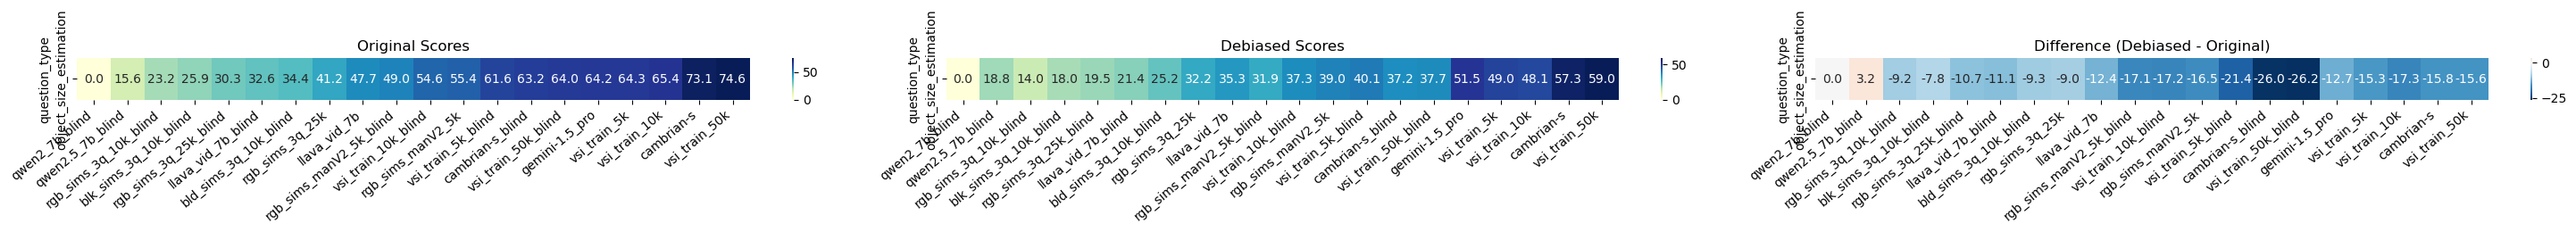

In [15]:
ids = dv.filter_object_size_estimation(qdf, budget=budget)
deb_qdf = qdf.loc[~qdf["id"].isin(ids)]
dv.visualize_debiasing_impact(qdf, deb_qdf);

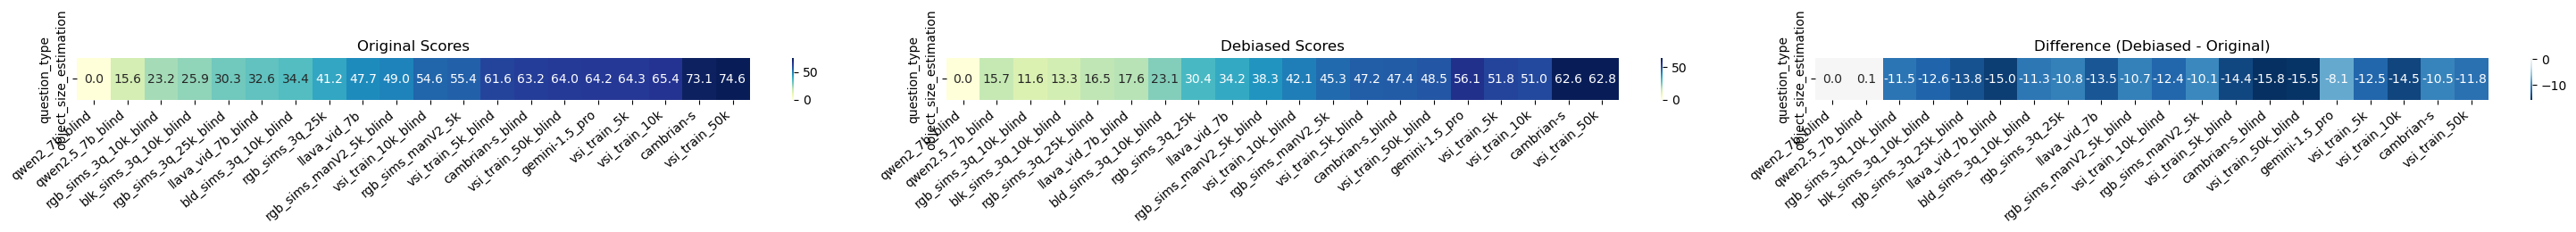

In [16]:
ids = dv.filter_object_size_estimation_hybrid(qdf, budget=budget, max_samples_low_var=5, max_samples_high_var=10)
deb_qdf = qdf.loc[~qdf["id"].isin(ids)]
dv.visualize_debiasing_impact(qdf, deb_qdf);

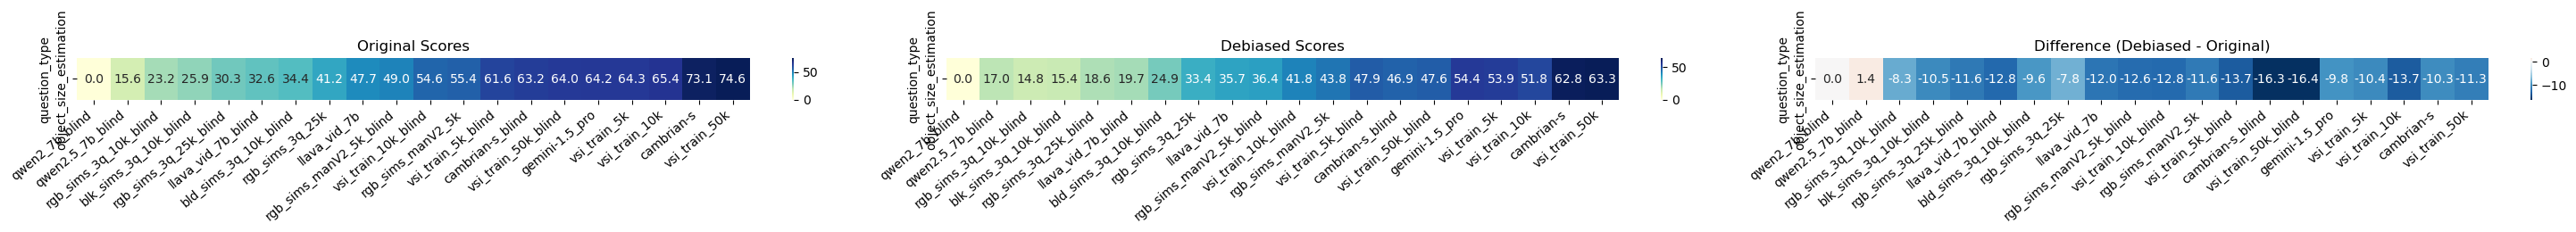

In [17]:
ids = dv.filter_object_size_estimation_hybrid(qdf, budget=budget)
deb_qdf = qdf.loc[~qdf["id"].isin(ids)]
dv.visualize_debiasing_impact(qdf, deb_qdf);

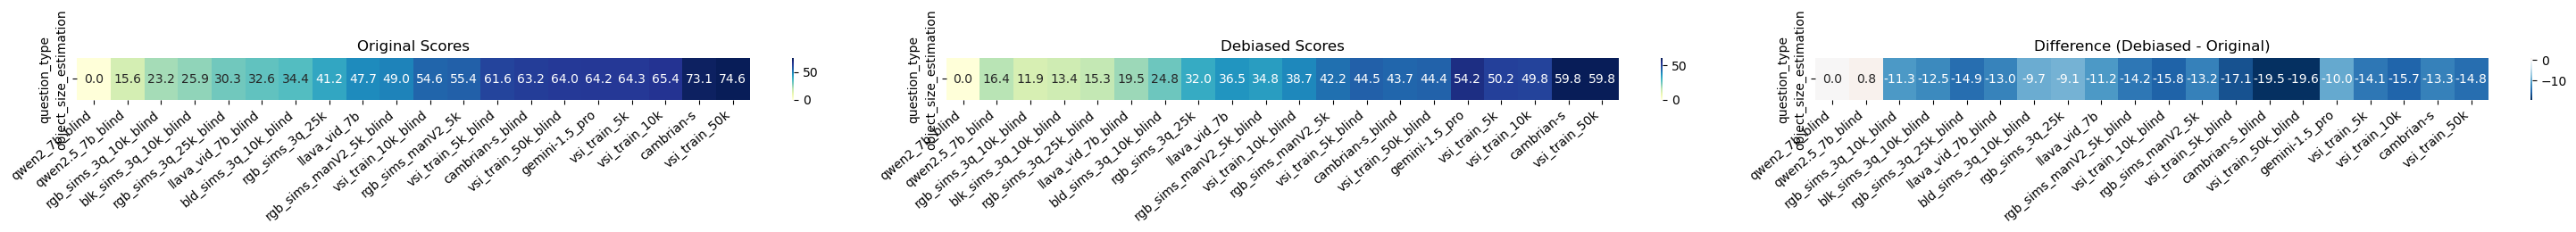

In [18]:
ids = dv.filter_object_size_estimation_scored(qdf, budget=budget)
deb_qdf = qdf.loc[~qdf["id"].isin(ids)]
dv.visualize_debiasing_impact(qdf, deb_qdf);

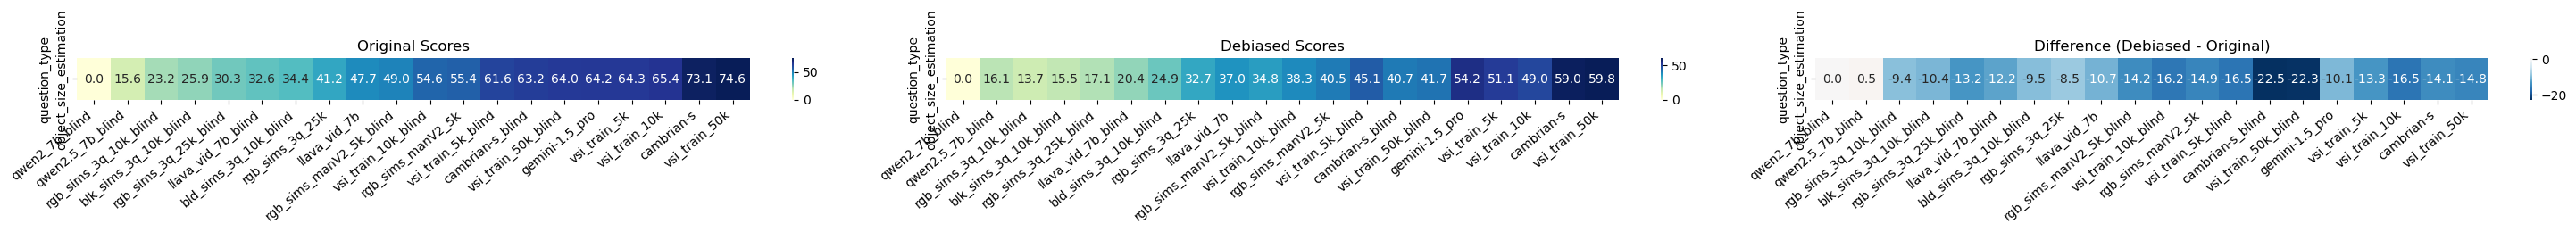

In [19]:
ids = dv.filter_object_size_estimation_scored(qdf, budget=budget, w_freq=1, w_ratio=1, w_dist=3)
deb_qdf = qdf.loc[~qdf["id"].isin(ids)]
dv.visualize_debiasing_impact(qdf, deb_qdf);

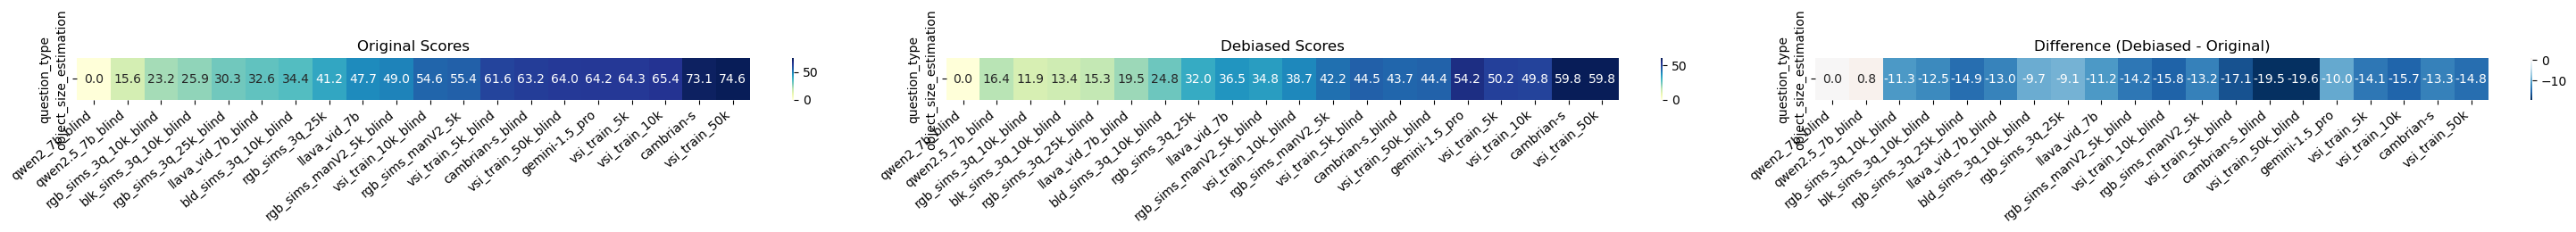

In [20]:
ids = dv.filter_object_size_estimation_scored(qdf, budget=budget, w_freq=3, w_ratio=4, w_dist=5)
deb_qdf = qdf.loc[~qdf["id"].isin(ids)]
dv.visualize_debiasing_impact(qdf, deb_qdf);

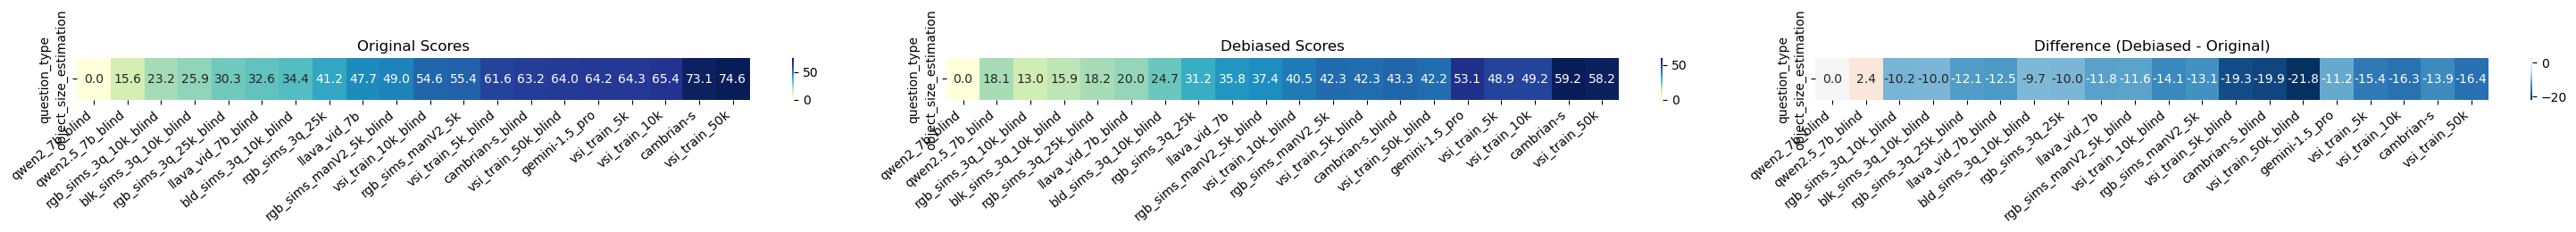

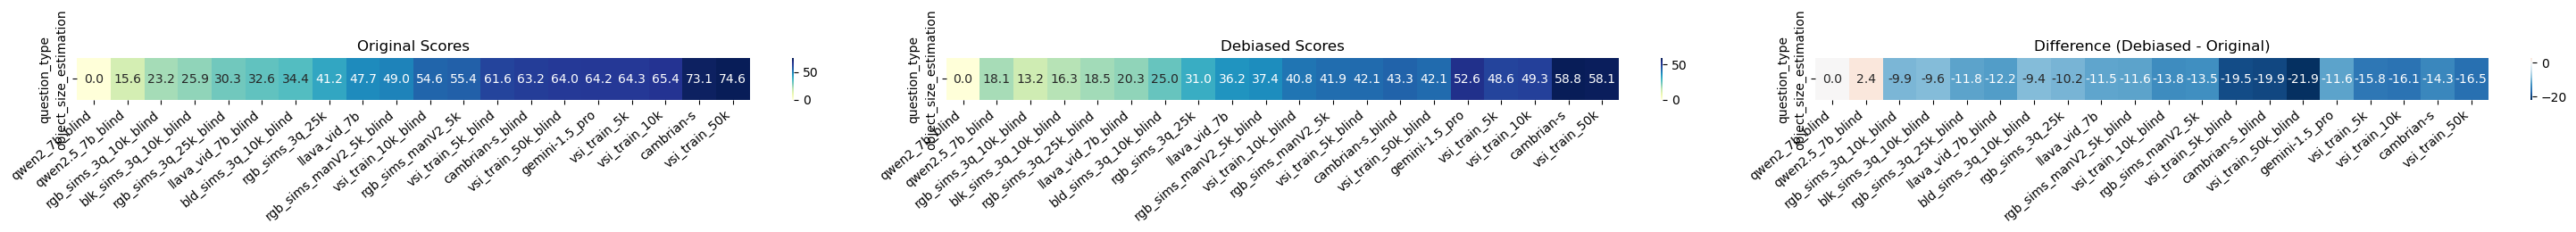

In [21]:
ids = dv.filter_object_size_estimation_scored(qdf, budget=700, w_freq=2, w_ratio=3, w_dist=4)
deb_qdf = qdf.loc[~qdf["id"].isin(ids)]
dv.visualize_debiasing_impact(qdf, deb_qdf);
ids = dv.filter_object_size_estimation_scored(qdf, budget=700, w_freq=0, w_ratio=0, w_dist=1)
deb_qdf = qdf.loc[~qdf["id"].isin(ids)]
dv.visualize_debiasing_impact(qdf, deb_qdf);

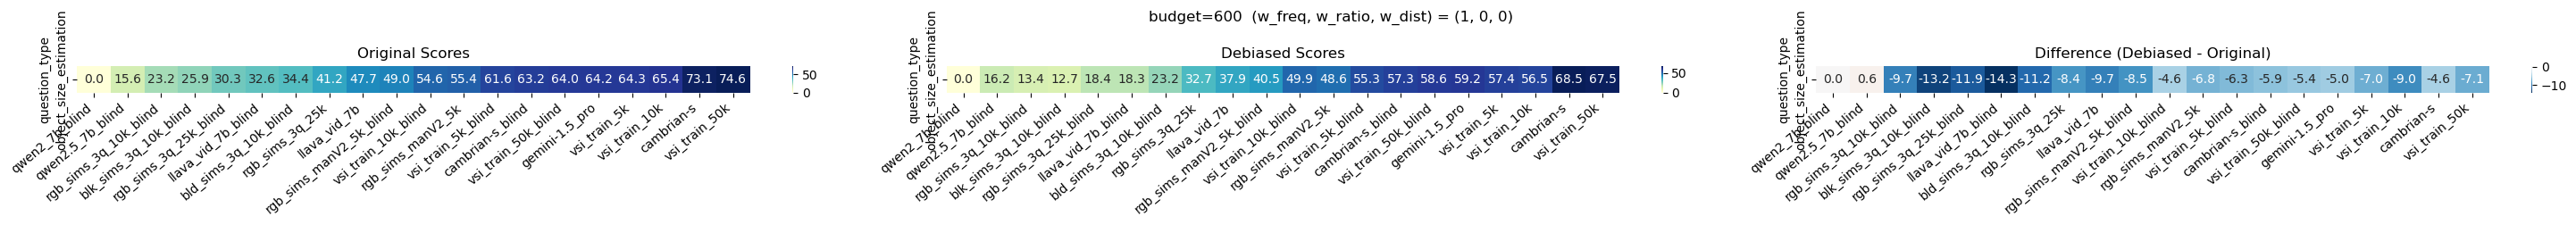

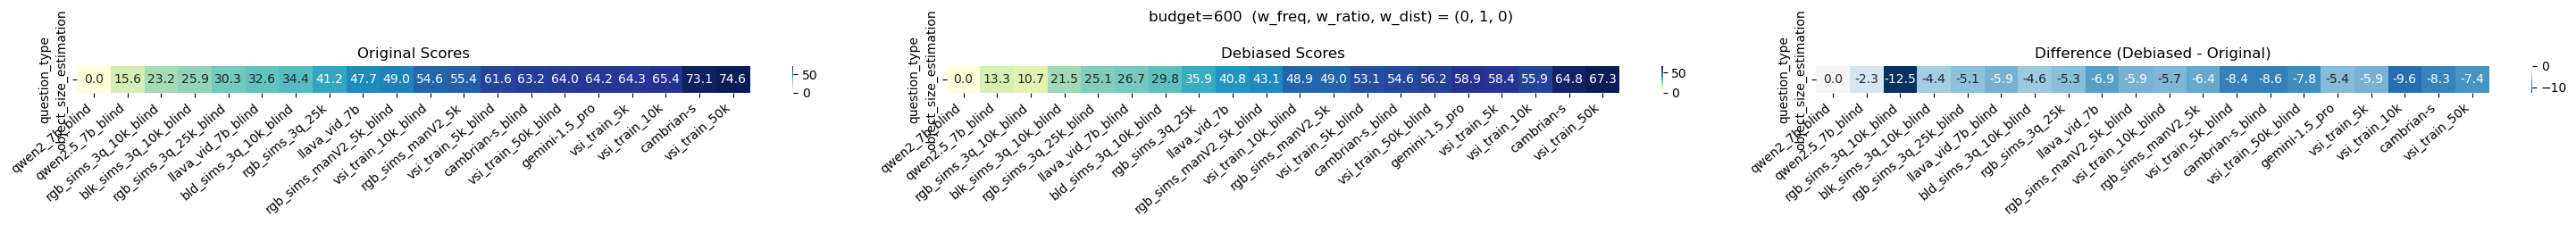

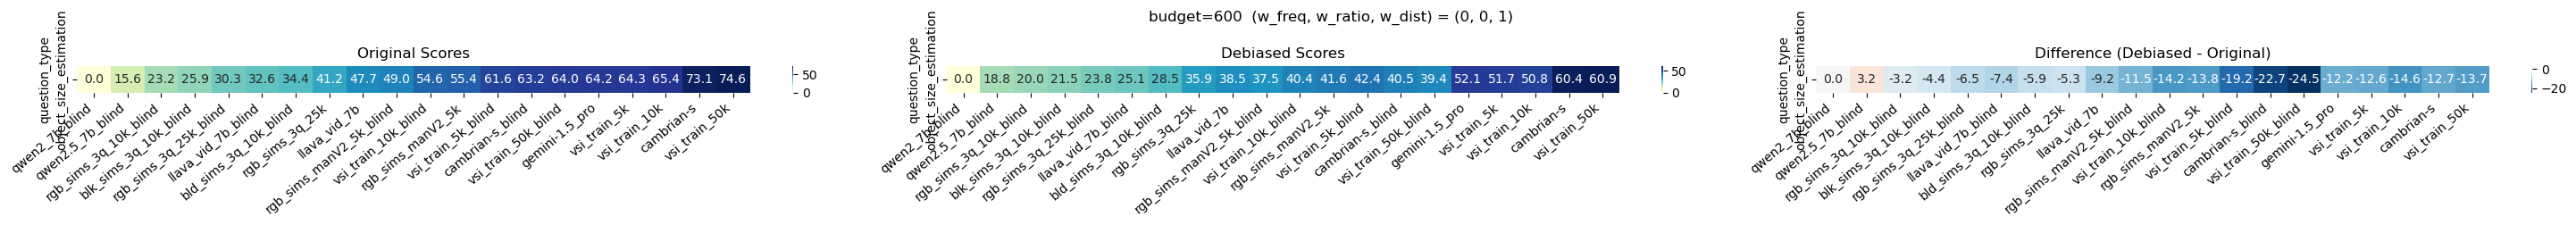

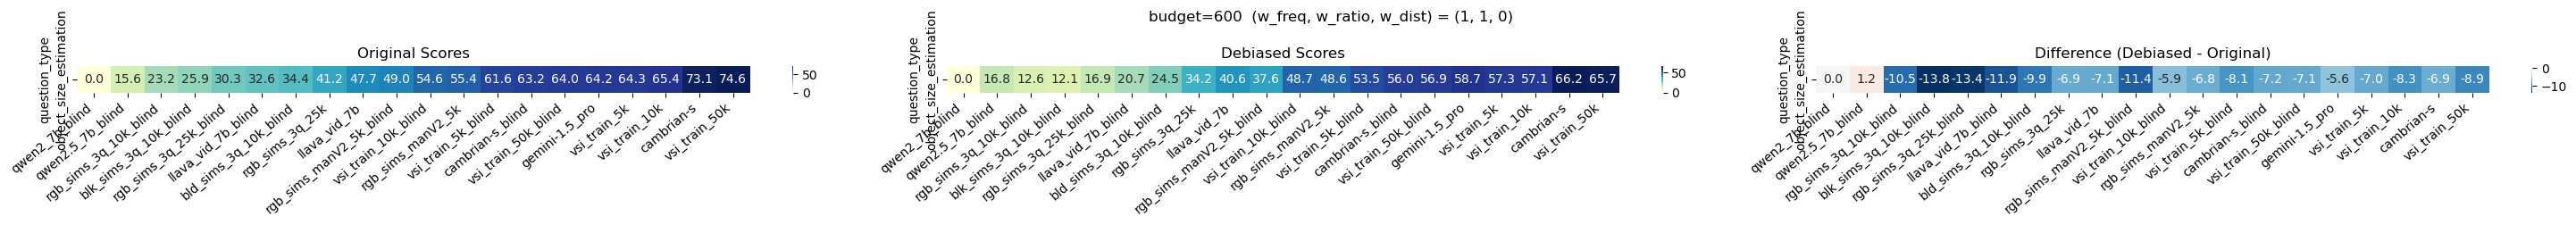

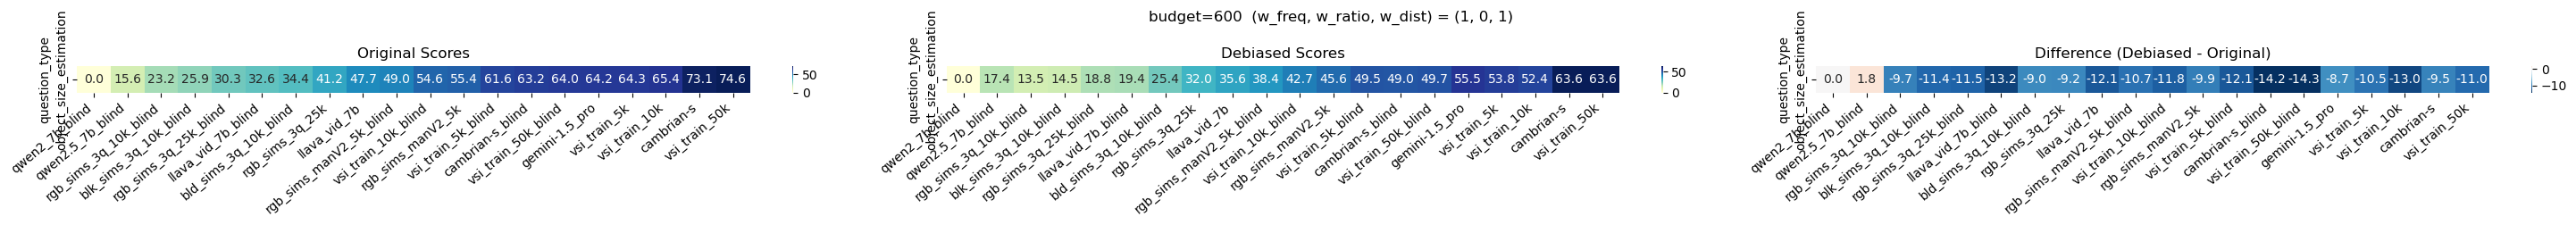

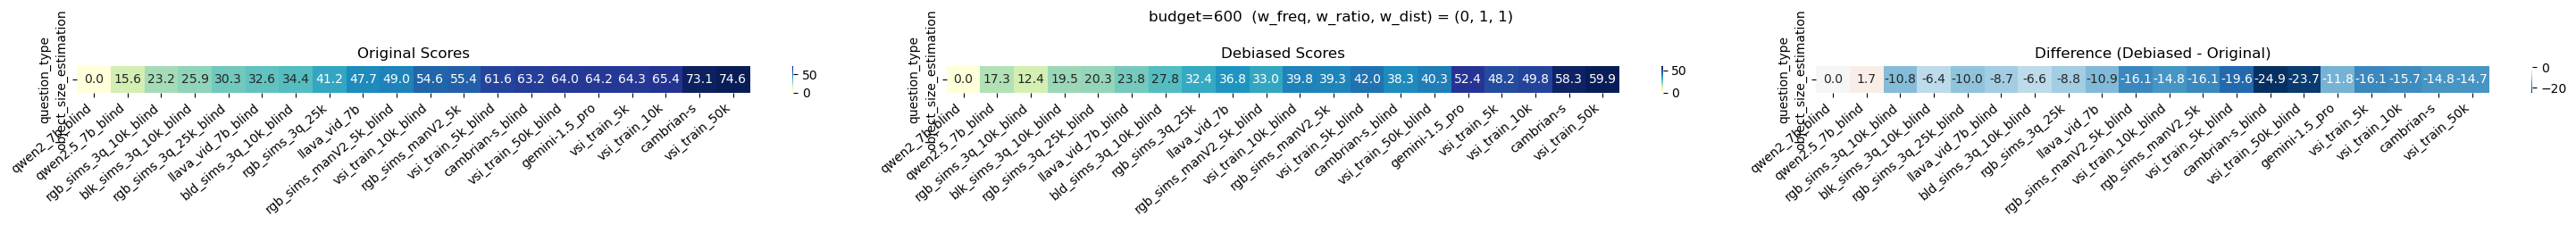

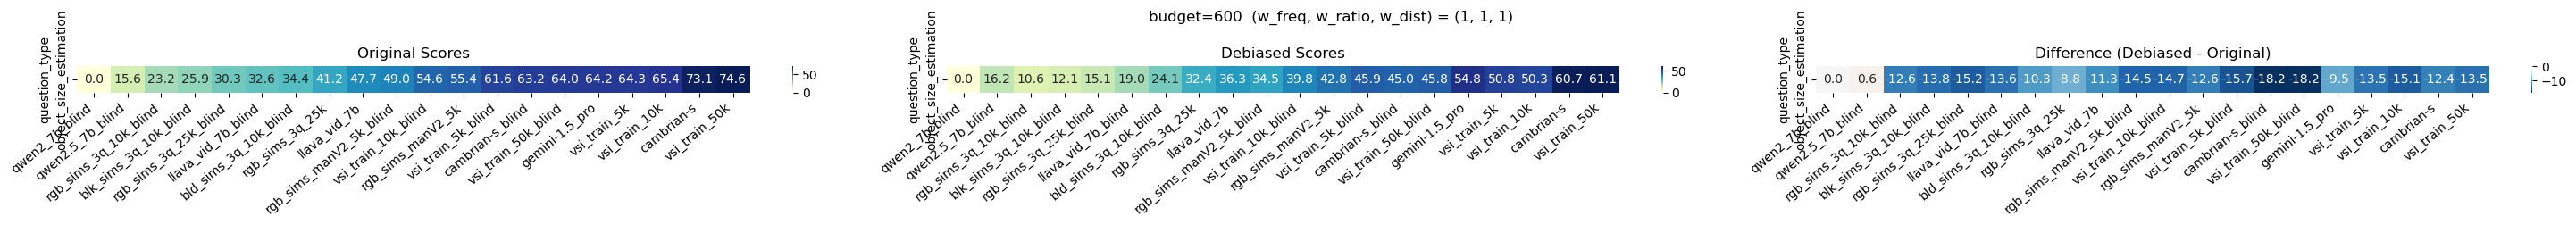

In [22]:
for w_freq, w_ratio, w_dist in (
    (1, 0, 0),
    (0, 1, 0),
    (0, 0, 1),
    (1, 1, 0),
    (1, 0, 1),
    (0, 1, 1),
    (1, 1, 1),
):
    ids = dv.filter_object_size_estimation_scored(qdf, budget=budget, w_freq=w_freq, w_ratio=w_ratio, w_dist=w_dist)
    deb_qdf = qdf.loc[~qdf["id"].isin(ids)]
    removed_qdf = qdf.loc[qdf["id"].isin(ids)]
    dv.visualize_debiasing_impact(qdf, deb_qdf, title=f"budget={budget}  (w_freq, w_ratio, w_dist) = ({w_freq}, {w_ratio}, {w_dist})");

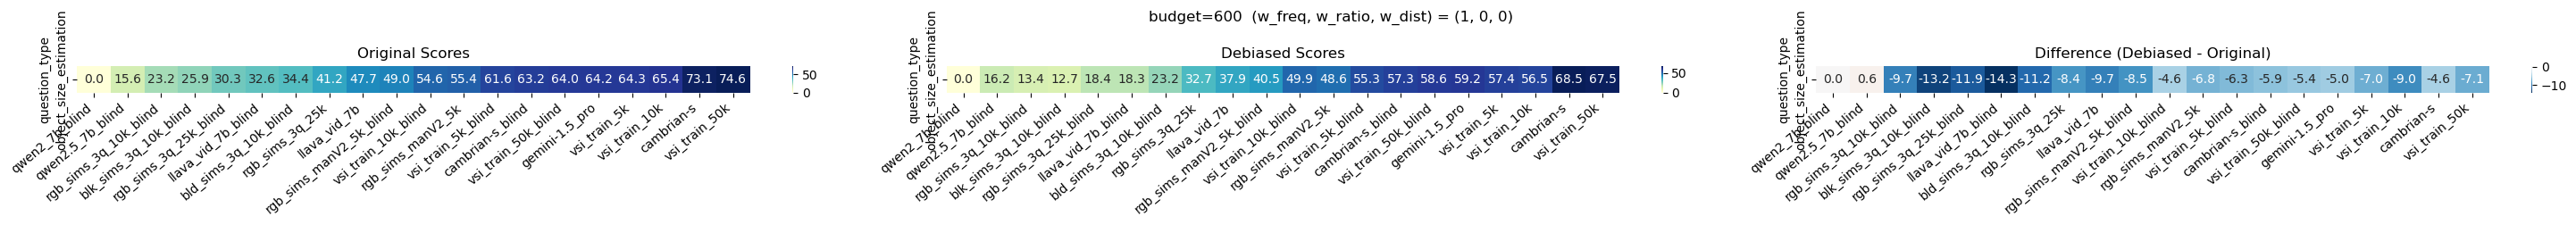

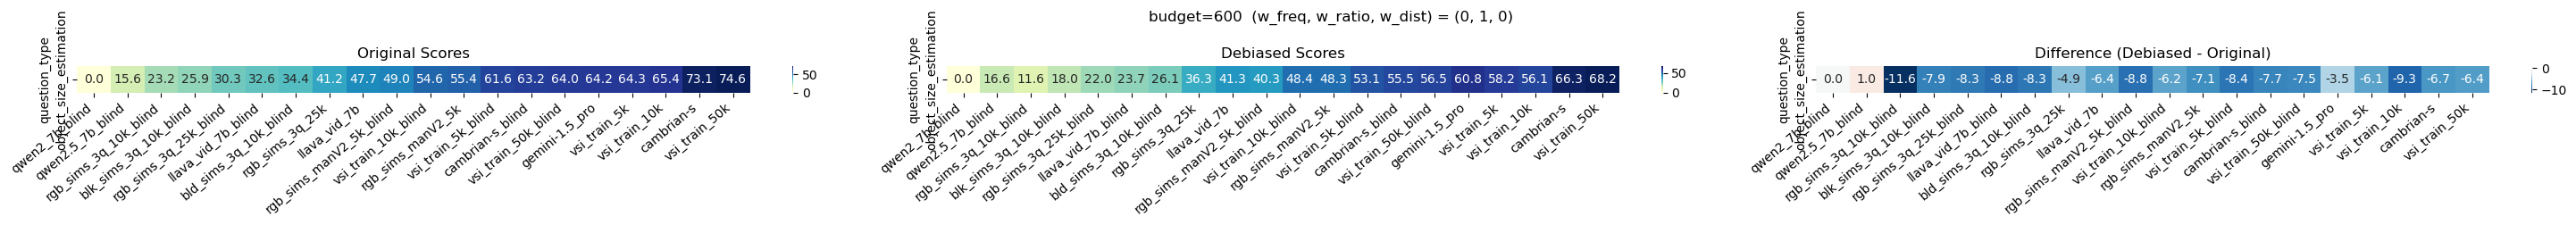

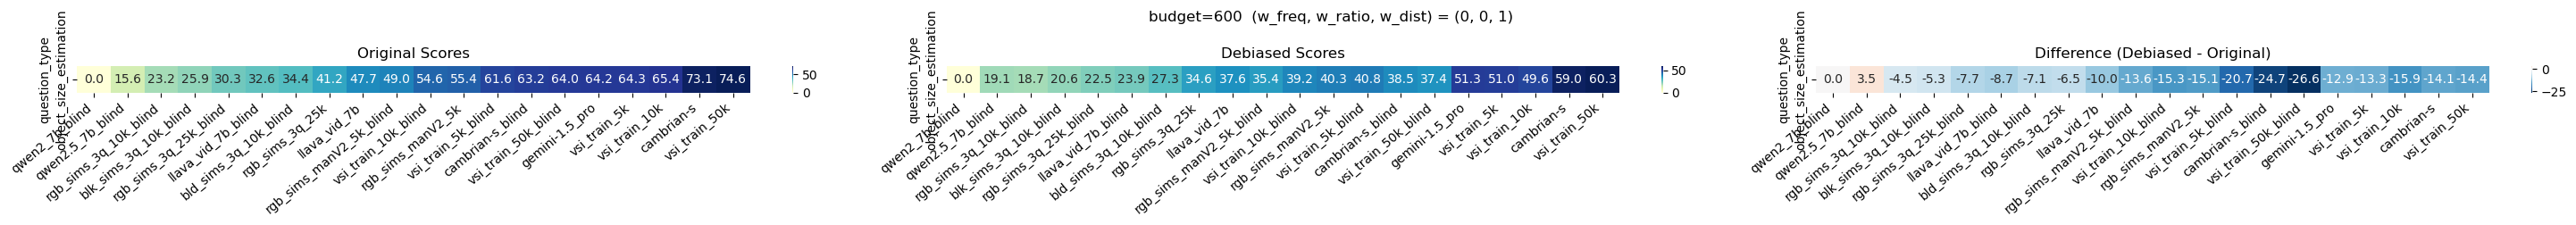

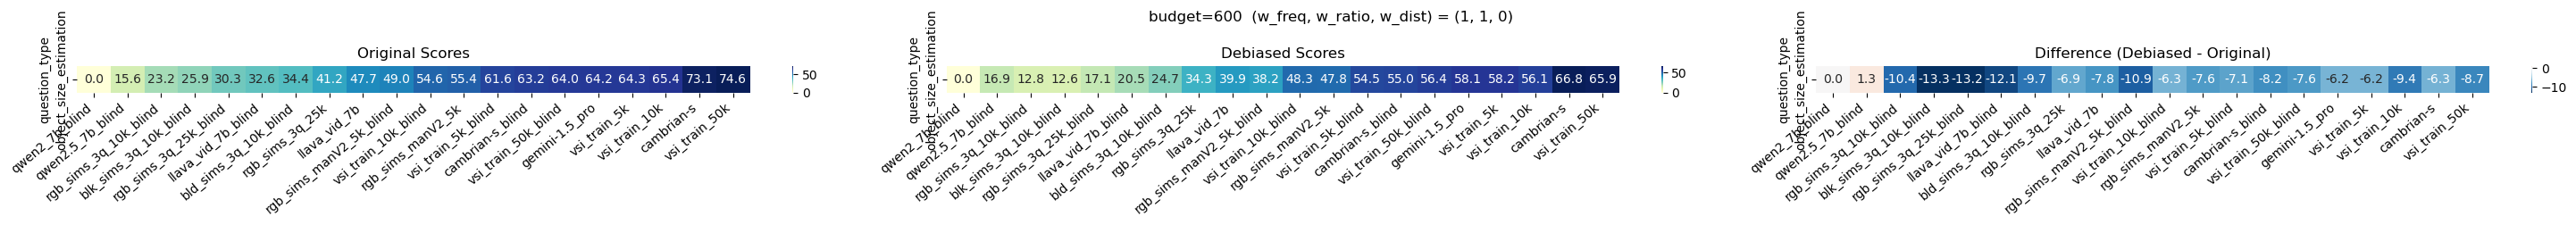

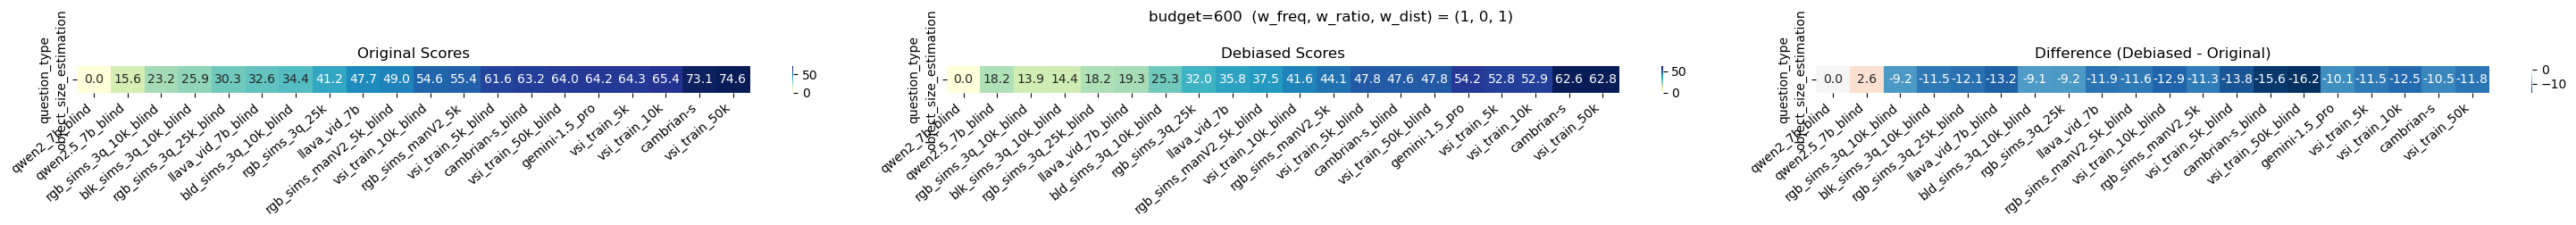

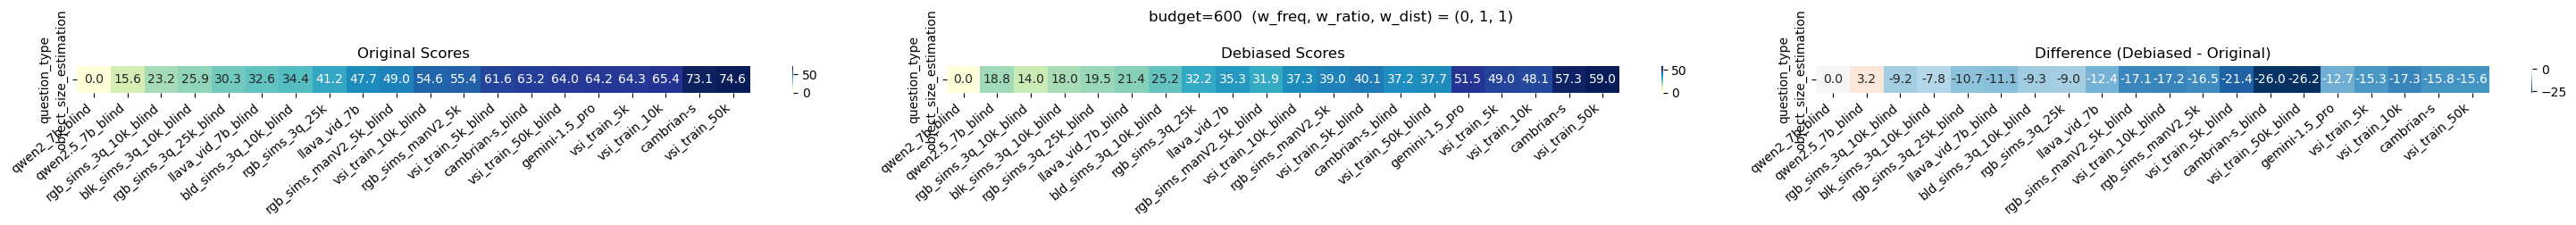

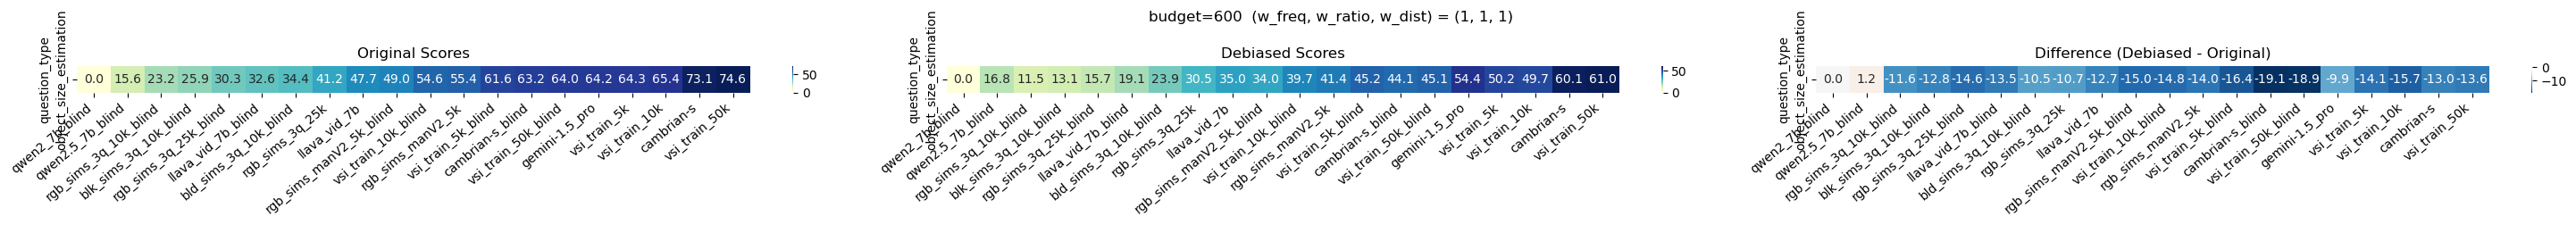

In [23]:
for w_freq, w_ratio, w_dist in (
    (1, 0, 0),
    (0, 1, 0),
    (0, 0, 1),
    (1, 1, 0),
    (1, 0, 1),
    (0, 1, 1),
    (1, 1, 1),
):
    ids = dv.filter_object_size_estimation_scored_v2(qdf, budget=budget, w_freq=w_freq, w_ratio=w_ratio, w_dist=w_dist, logscale=True)
    deb_qdf = qdf.loc[~qdf["id"].isin(ids)]
    removed_qdf = qdf.loc[qdf["id"].isin(ids)]
    dv.visualize_debiasing_impact(qdf, deb_qdf, title=f"budget={budget}  (w_freq, w_ratio, w_dist) = ({w_freq}, {w_ratio}, {w_dist})");

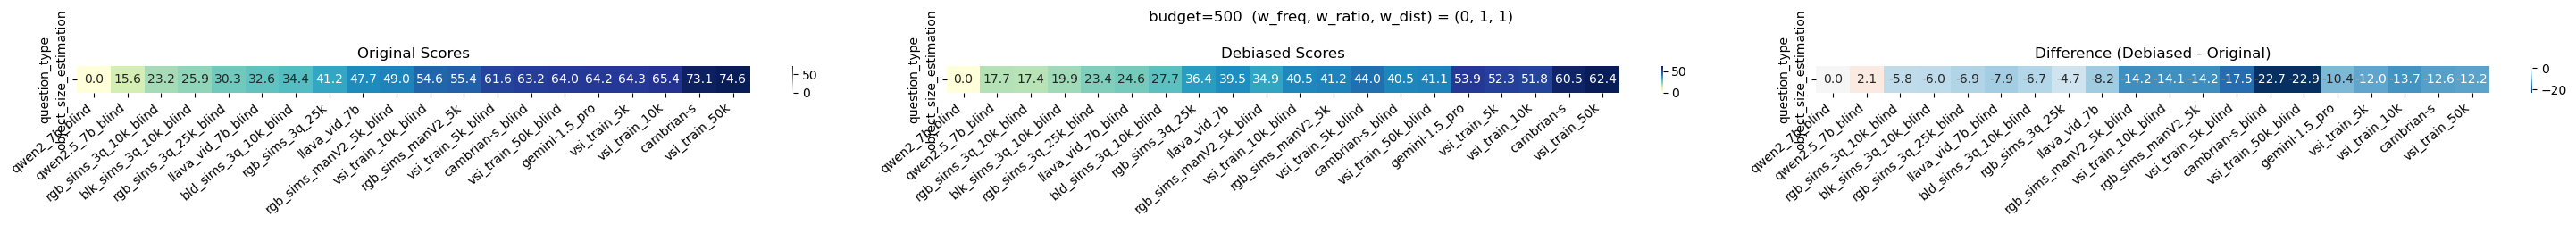

In [24]:
budget = 500
for w_freq, w_ratio, w_dist in (
    (0, 1, 1),
):
    ids = dv.filter_object_size_estimation_scored_v2(qdf, budget=budget, w_freq=w_freq, w_ratio=w_ratio, w_dist=w_dist, logscale=True)
    deb_qdf = qdf.loc[~qdf["id"].isin(ids)]
    removed_qdf = qdf.loc[qdf["id"].isin(ids)]
    dv.visualize_debiasing_impact(qdf, deb_qdf, title=f"budget={budget}  (w_freq, w_ratio, w_dist) = ({w_freq}, {w_ratio}, {w_dist})");

In [25]:
np.log([2,5,10,20])

array([0.69314718, 1.60943791, 2.30258509, 2.99573227])

In [26]:
print("Debiased object size estimation rows")
get_obj_stats(qdf.loc[qdf["id"].isin(ids)]).sort_values("count", ascending=False)

Debiased object size estimation rows


object  count        mean        std     ratio
10            door     59  196.593220  22.463087  0.114262
2              bed     53  216.320755  10.461971  0.048363
33              tv     43   93.790698  11.224035  0.119671
27           table     40  131.450000  14.827123  0.112797
4            chair     31   88.483871   8.049310  0.090969
23    refrigerator     27  167.074074  15.203557  0.090999
24            sofa     27  187.037037  22.663901  0.121173
29          toilet     22   77.909091   5.406426  0.069394
1          bathtub     20  163.600000   7.755473  0.047405
26           stove     20   63.200000   5.549775  0.087813
34          washer     16   87.250000   3.316625  0.038013
36          window     13  140.230769  15.194044  0.108350
28       telephone     13   28.461538   2.633609  0.092532
11       fireplace     13  153.846154  10.605393  0.068935
0         backpack     12   52.333333   4.830459  0.092302
25           stool     11   48.272727   3.875330  0.080280
16       microwave      9   53.888889   6.253888  0.116052
17          mirror      8   97.625000   9.767841  0.100055
12          heater      7  143.000000  15.874508  0.111011
13        keyboard      7   45.571429   1.988060  0.043625
21         printer      5   57.600000   3.646917  0.063315
19      nightstand      5   68.000000   4.358899  0.064101
14            lamp      4   63.000000   1.414214  0.022448
7          counter      4  259.250000  29.341381  0.113178
5            clock      4   34.500000   4.358899  0.126345
6   computer mouse      3   11.666667   0.577350  0.049487
32       trash can      3   38.666667   4.725816  0.122219
31       trash bin      3   50.000000   1.000000  0.020000
18         monitor      3   56.333333   1.527525  0.027116
9       dishwasher      2   91.000000   0.000000  0.000000
20          pillow      2   67.000000   1.414214  0.021108
35      whiteboard      2  185.500000   3.535534  0.019059
3        bookshelf      2  176.500000  28.991378  0.164257
30           towel      2   75.000000   2.828427  0.037712
22        radiator      2  122.000000  11.313708  0.092735
8              cup      2   14.000000   1.414214  0.101015
15          laptop      1   38.000000   0.000000  0.000000

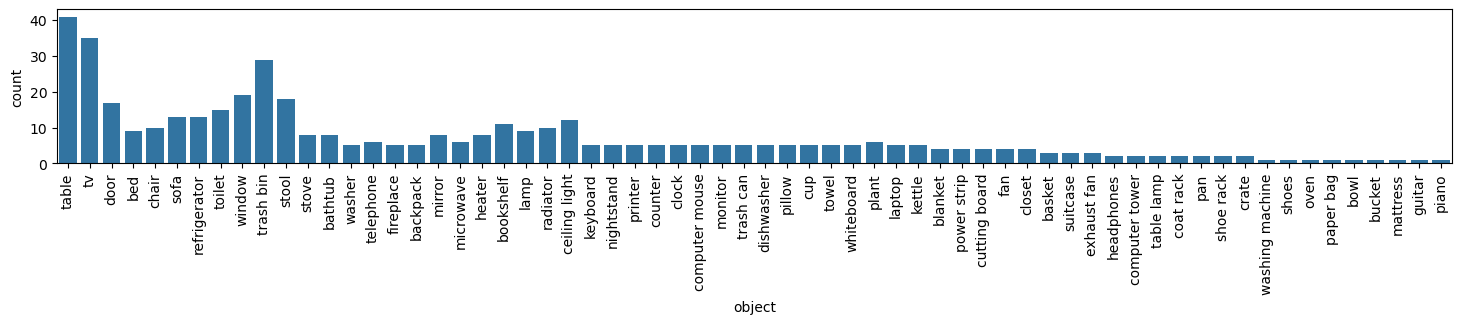

In [27]:
# visualize the distribution of objects
plt.figure(figsize=(18, 2))

sns.countplot(data=deb_qdf, x="object", order=qdf["object"].value_counts().index)
plt.xticks(rotation=90)
print()

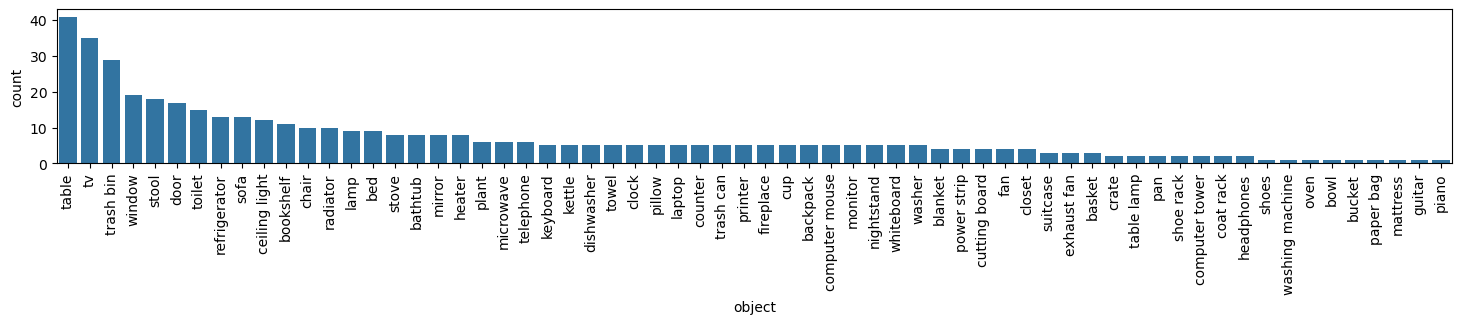

In [28]:
# visualize the distribution of objects
plt.figure(figsize=(18, 2))

sns.countplot(data=deb_qdf, x="object", order=deb_qdf["object"].value_counts().index)
plt.xticks(rotation=90)
print()

In [29]:
# get_obj_stats(deb_qdf).sort_values("count", ascending=False)

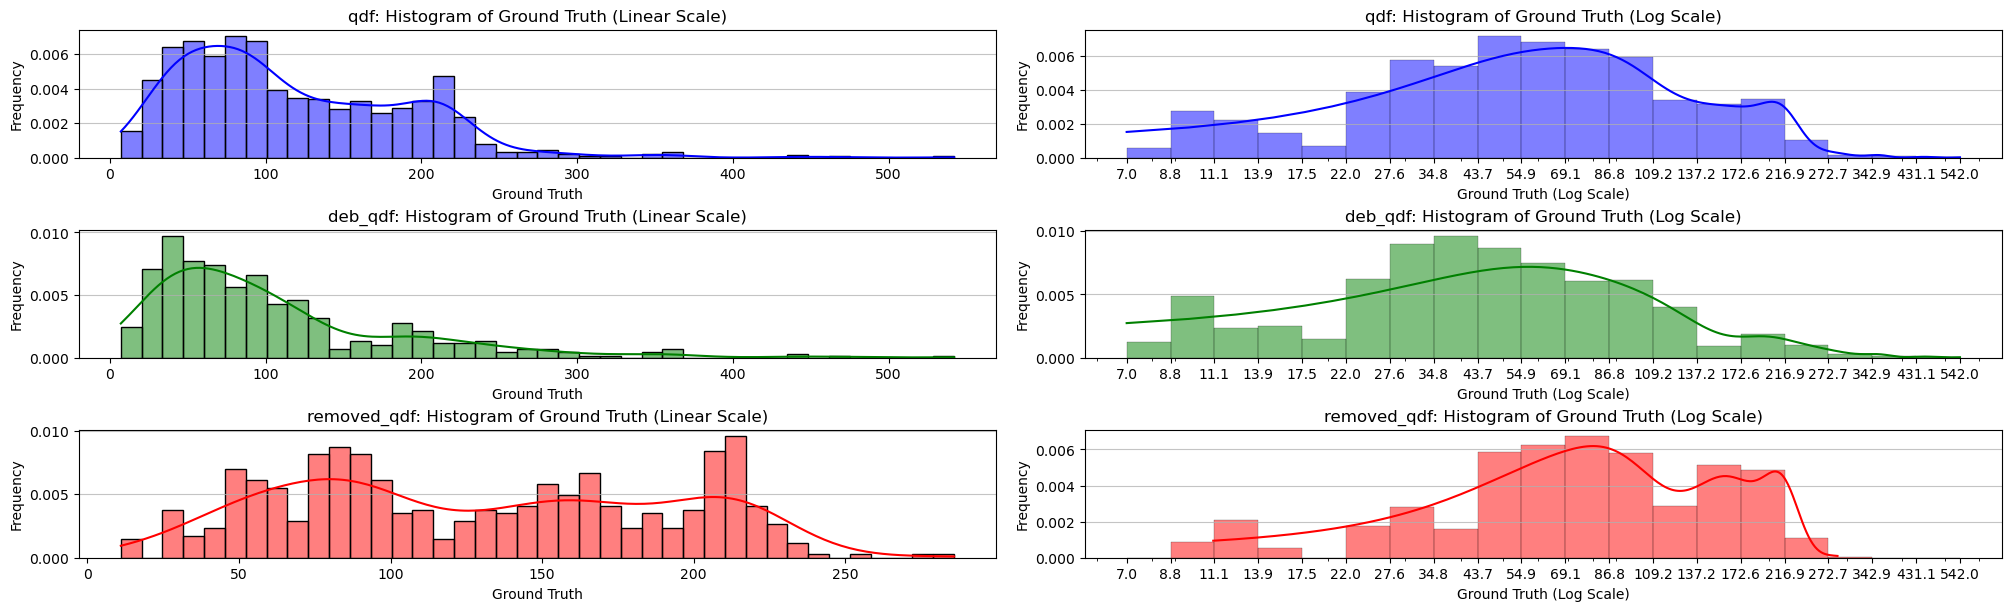

In [30]:
fig, axes = plt.subplots(3, 2, figsize=(20, 6), constrained_layout=True)

gt_series_qdf = qdf['ground_truth_num'].dropna()
gt_series_deb_qdf = deb_qdf['ground_truth_num'].dropna()
gt_series_removed_qdf = removed_qdf['ground_truth_num'].dropna()

# Top-left plot: qdf Linear scale
sns.histplot(gt_series_qdf, bins=40, kde=True, color='blue', edgecolor='black', ax=axes[0, 0], stat='density')
axes[0, 0].set_xlabel('Ground Truth')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('qdf: Histogram of Ground Truth (Linear Scale)')
axes[0, 0].grid(axis='y', alpha=0.75)

# Top-right plot: qdf Log scale

min_val = min(gt_series_qdf.min(), gt_series_deb_qdf.min(), gt_series_removed_qdf.min())
max_val = max(gt_series_qdf.max(), gt_series_deb_qdf.max(), gt_series_removed_qdf.max())
bins_logscale = np.logspace(np.log10(min_val), np.log10(max_val), 20)

# bins_qdf = np.logspace(np.log10(gt_series_qdf.min()), np.log10(gt_series_qdf.max()), 17)
sns.histplot(gt_series_qdf, bins=bins_logscale, kde=True, color='blue', edgecolor='black', ax=axes[0, 1], stat='density')
axes[0, 1].set_xscale('log')
axes[0, 1].set_xlabel('Ground Truth (Log Scale)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('qdf: Histogram of Ground Truth (Log Scale)')
axes[0, 1].grid(axis='y', alpha=0.75)
axes[0, 1].set_xticks(bins_logscale)
axes[0, 1].set_xticklabels([f"{tick:.1f}" for tick in bins_logscale])

# Middle-left plot: deb_qdf Linear scale

sns.histplot(gt_series_deb_qdf, bins=40, kde=True, color='green', edgecolor='black', ax=axes[1, 0], stat='density')
axes[1, 0].set_xlabel('Ground Truth')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('deb_qdf: Histogram of Ground Truth (Linear Scale)')
axes[1, 0].grid(axis='y', alpha=0.75)

# Middle-right plot: deb_qdf Log scale
# bins_deb_qdf = np.logspace(np.log10(gt_series_deb_qdf.min()), np.log10(gt_series_deb_qdf.max()), 17)
sns.histplot(gt_series_deb_qdf, bins=bins_logscale, kde=True, color='green', edgecolor='black', ax=axes[1, 1], stat='density')
axes[1, 1].set_xscale('log')
axes[1, 1].set_xlabel('Ground Truth (Log Scale)')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('deb_qdf: Histogram of Ground Truth (Log Scale)')
axes[1, 1].grid(axis='y', alpha=0.75)
axes[1, 1].set_xticks(bins_logscale)
axes[1, 1].set_xticklabels([f"{tick:.1f}" for tick in bins_logscale])

# Bottom-left plot: removed_qdf Linear scale
sns.histplot(gt_series_removed_qdf, bins=40, kde=True, color='red', edgecolor='black', ax=axes[2, 0], stat='density')
axes[2, 0].set_xlabel('Ground Truth')
axes[2, 0].set_ylabel('Frequency')
axes[2, 0].set_title('removed_qdf: Histogram of Ground Truth (Linear Scale)')
axes[2, 0].grid(axis='y', alpha=0.75)

# Bottom-right plot: removed_qdf Log scale
# bins_removed_qdf = np.logspace(np.log10(gt_series_removed_qdf.min()), np.log10(gt_series_removed_qdf.max()), 17)
sns.histplot(gt_series_removed_qdf, bins=bins_logscale, kde=True, color='red', edgecolor='black', ax=axes[2, 1], stat='density')
axes[2, 1].set_xscale('log')
axes[2, 1].set_xlabel('Ground Truth (Log Scale)')
axes[2, 1].set_ylabel('Frequency')
axes[2, 1].set_title('removed_qdf: Histogram of Ground Truth (Log Scale)')
axes[2, 1].grid(axis='y', alpha=0.75)
axes[2, 1].set_xticks(bins_logscale)
axes[2, 1].set_xticklabels([f"{tick:.1f}" for tick in bins_logscale])

plt.show()


In [31]:
a = dv.evaluate_models(qdf.loc[qdf["id"].isin(ids)])
b = dv.evaluate_models(qdf.loc[~qdf["id"].isin(ids)])
c = dv.evaluate_models(qdf)
d = b - c
# concat the dfs
# pd.concat([a, b], axis=0, ignore_index=True).rename(index={0: "Removed", 1: "Debiased"})
# pd.concat([a, b, c], axis=0, ignore_index=True).rename(index={0: "Removed", 1: "Debiased", 2: "Original"})
pd.concat([a, b, c, d], axis=0, ignore_index=True).rename(index={0: "Removed", 1: "Debiased", 2: "Original", 3: "Difference"}) * 100

bld_sims_3q_10k_blind  blk_sims_3q_10k_blind   cambrian-s  \
Removed               4048.000000            3130.000000  8454.000000   
Debiased              2774.834437            1991.169978  6046.357616   
Original              3442.812172            2588.667366  7309.548793   
Difference            -667.977735            -597.497388 -1263.191177   

            cambrian-s_blind  gemini-1.5_pro  llava_vid_7b  \
Removed          8376.000000     7366.000000   5510.000000   
Debiased         4050.772627     5386.313466   3949.227373   
Original         6320.041973     6424.973767   4768.100735   
Difference      -2269.269346    -1038.660301   -818.873361   

            llava_vid_7b_blind  qwen2.5_7b_blind  qwen2_7b_blind  \
Removed            3976.000000       1372.000000             0.0   
Debiased           2461.368653       1770.419426             0.0   
Original           3256.033578       1561.385100             0.0   
Difference         -794.664925        209.034326             0.0   

            rgb_sims_3q_10k_blind  rgb_sims_3q_25k  rgb_sims_3q_25k_blind  \
Removed               2838.000000      4548.000000            3652.000000   
Debiased              1739.514349      3644.591611            2337.748344   
Original              2315.844701      4118.572928            3027.282267   
Difference            -576.330352      -473.981316            -689.533922   

            rgb_sims_manV2_5k  rgb_sims_manV2_5k_blind  vsi_train_10k  \
Removed           6830.000000              6188.000000    7782.000000   
Debiased          4116.997792              3485.651214    5176.600442   
Original          5540.398741              4903.462749    6543.546695   
Difference       -1423.400948             -1417.811535   -1366.946253   

            vsi_train_10k_blind  vsi_train_50k  vsi_train_50k_blind  \
Removed             6732.000000    8564.000000          8470.000000   
Debiased            4046.357616    6242.825607          4110.375276   
Original            5455.403987    7460.650577          6397.691501   
Difference         -1409.046372   -1217.824970         -2287.316225   

            vsi_train_5k  vsi_train_5k_blind  
Removed      7524.000000         7748.000000  
Debiased     5229.580574         4403.973510  
Original     6433.368311         6158.447009  
Difference  -1203.787737        -1754.473500

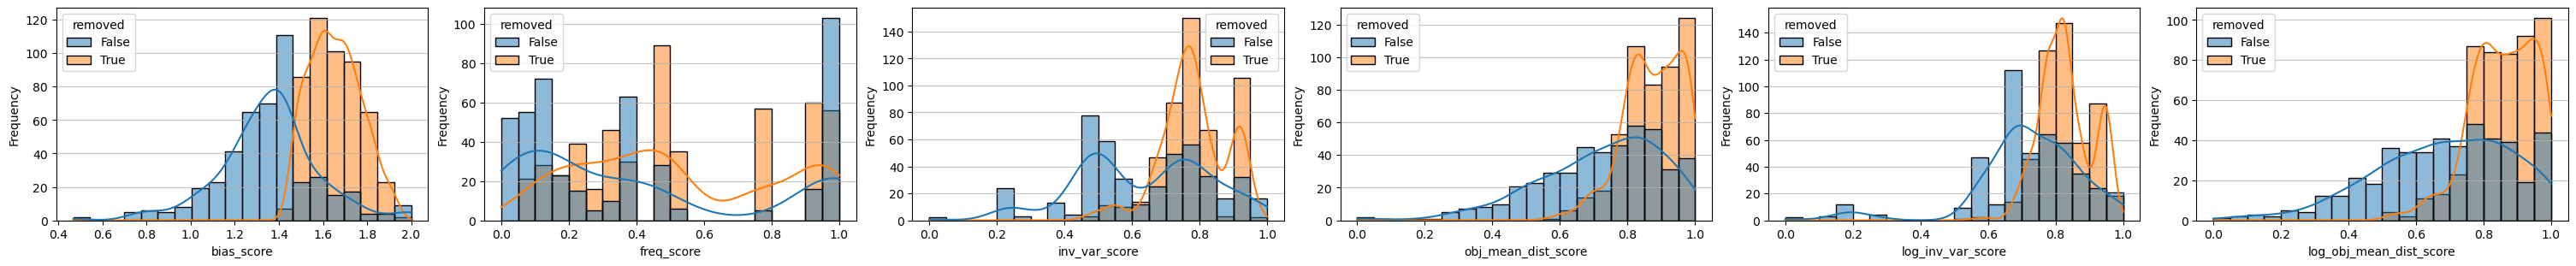

In [32]:
budget = 500

w_freq = 0
w_ratio = 1
w_dist = 1
# logscale = True
logscale = False

remove_ids = dv.filter_object_size_estimation_scored_v2(qdf, budget, w_freq=w_freq, w_ratio=w_ratio, w_dist=w_dist, logscale=logscale)
df_filtered = dv.get_object_size_estimation_scores_v2(qdf, w_freq=w_freq, w_ratio=w_ratio, w_dist=w_dist, logscale=logscale)
df_sorted = df_filtered.sort_values("bias_score", ascending=False)
df_sorted["removed"] = df_sorted["id"].isin(remove_ids)


# scores = ["obj_freq_score", "val_freq_score", "combo_freq_score", "bias_score"]
# scores = ["pair_freq_score", "inv_var_score", "close_score", "bias_score"]
scores = [
    "bias_score",
    "freq_score",
    "inv_var_score",
    "obj_mean_dist_score",
    "log_inv_var_score",
    "log_obj_mean_dist_score",
]

# Visualize the distribution of scores in subplots
fig, axes = plt.subplots(1, len(scores), figsize=(5*len(scores), 3), constrained_layout=True)
if len(scores) == 1:
    axes = [axes]  # Ensure axes is iterable even if there's only one score

for i, score in enumerate(scores):
    sns.histplot(data=df_sorted, x=score, bins=20, kde=True, hue="removed", ax=axes[i])
    axes[i].set_ylabel("Frequency")
    axes[i].grid(axis='y', alpha=0.75)
plt.show()